In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
try:
  drive.mount('/content/drive', force_remount=True)
except PermissionError:
  print("Permission error occurred, rerun the code to grant permission.")
  raise

Mounted at /content/drive


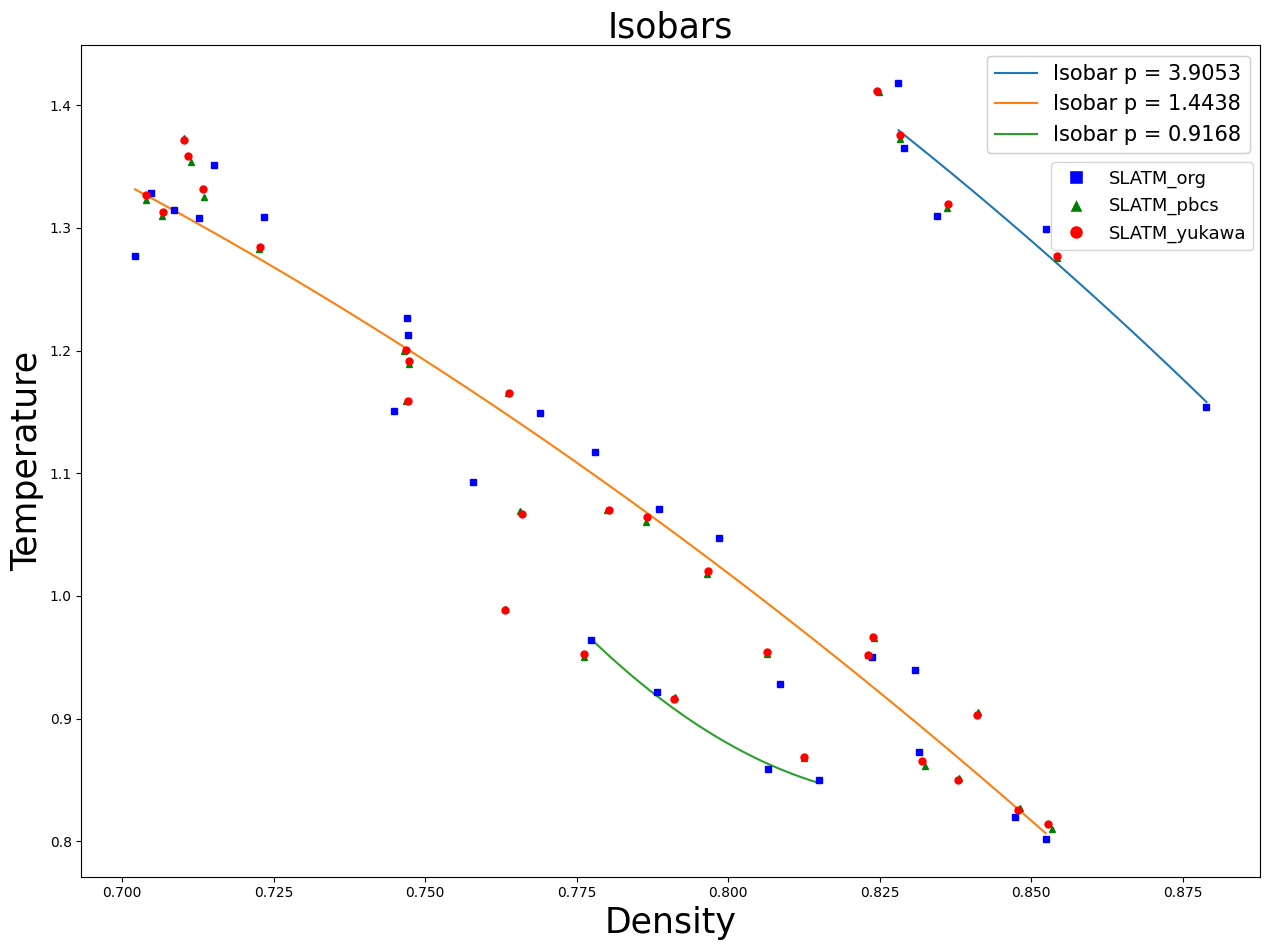

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.cluster.vq import kmeans

# Load the original data (simulation results)
df_original = pd.read_csv('/content/drive/MyDrive/thermo.csv')

# Load the predicted values for s1, s2, and s3
predicted_s1 = pd.read_csv('/content/drive/MyDrive/predicted_new_values_s1.csv')
predicted_s2 = pd.read_csv('/content/drive/MyDrive/predicted_new_values_s2.csv')
predicted_s3 = pd.read_csv('/content/drive/MyDrive/predicted_new_values_s3.csv')

# Identify accumulation points in the original data
p_original = df_original['pressure'].values
kmeans_model = kmeans(p_original, 2)
p1_original, p2_original = kmeans_model[0]

# Calculate delta values for isobars based on original data
delta1_original = np.min([p1_original, np.std(p_original)]) / 6
delta2_original = np.min([p2_original, np.std(p_original)]) / 6
#delta3_original = np.min([p3_original, np.std(p_original)]) / 6


# Define isobars based on original data
isobars = []
for p, delta in [(p1_original, delta1_original), (p2_original, delta2_original), (p3_original, delta3_original)]:
    isobar = [p - delta, p + delta]
    isobars.append(isobar)

# Filter data for each isobar and plot
fig, ax = plt.subplots(figsize=(12.8, 9.6))
colors = ['blue', 'green', 'red'] # Colors for s1, s2, s3

for i, isobar in enumerate(isobars):
    # Filter original data
    mask_original = (df_original['pressure'] >= isobar[0]) & (df_original['pressure'] <= isobar[1])
    filtered_df_original = df_original[mask_original]

    # Filter predicted data for s1, s2, and s3
    mask_predicted_s1 = (predicted_s1['predicted_avg_pressure'] >= isobar[0]) & (predicted_s1['predicted_avg_pressure'] <= isobar[1])
    filtered_df_predicted_s1 = predicted_s1[mask_predicted_s1]

    mask_predicted_s2 = (predicted_s2['predicted_avg_pressure'] >= isobar[0]) & (predicted_s2['predicted_avg_pressure'] <= isobar[1])
    filtered_df_predicted_s2 = predicted_s2[mask_predicted_s2]

    mask_predicted_s3 = (predicted_s3['predicted_avg_pressure'] >= isobar[0]) & (predicted_s3['predicted_avg_pressure'] <= isobar[1])
    filtered_df_predicted_s3 = predicted_s3[mask_predicted_s3]

    # Define a linear function to fit to the data
    def lin_func(x, a, b, c):
        return a * x**2 + b * x + c

    # Fit the linear function to the data
    popt_s1, pcov_s1 = curve_fit(lin_func, filtered_df_predicted_s1['predicted_density'], filtered_df_predicted_s1['predicted_avg_temp'])

    # Plot the fitted curve for s1
    x_fit = np.linspace(filtered_df_predicted_s1['predicted_density'].min(), filtered_df_predicted_s1['predicted_density'].max(), 100)
    y_fit_s1 = lin_func(x_fit, *popt_s1)
    ax.plot(x_fit, y_fit_s1, label=f'Isobar p = {(isobar[0]+isobar[1])/2:.4f}')
    #ax.plot(x_fit, y_fit_s1, color=colors[0], label=f'Fitted Curve (s1)')

    # Plot the predicted data points for s1, s2, and s3 with different markers and colors
    ax.plot(filtered_df_predicted_s2['predicted_density'], filtered_df_predicted_s2['predicted_avg_temp'], '^', markersize=5, color=colors[1])
    ax.plot(filtered_df_predicted_s1['predicted_density'], filtered_df_predicted_s1['predicted_avg_temp'], 's', markersize=5, color=colors[0])
    ax.plot(filtered_df_predicted_s3['predicted_density'], filtered_df_predicted_s3['predicted_avg_temp'], 'o', markersize=5, color=colors[2])




# Create a customized legend
legend_markers = ax.legend(handles=[
    plt.Line2D([0], [0], marker='s', color='w', label='SLATM_org', markerfacecolor=colors[0], markersize=10),
    plt.Line2D([0], [0], marker='^', color='w', label='SLATM_pbcs', markerfacecolor=colors[1], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='SLATM_yukawa', markerfacecolor=colors[2], markersize=10),
], loc='upper left', bbox_to_anchor=(0.815, 0.87), fontsize='13')

# Add the customized legend to the plot
ax.add_artist(legend_markers)

# Add a title, labels, and legend
ax.set_title('Isobars', fontsize='25')
ax.set_xlabel('Density', fontsize='25')
ax.set_ylabel('Temperature', fontsize='25')

# Create a customized legend
legend_isobar = ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize='15')

# Add the customized legend to the plot
ax.add_artist(legend_isobar)
plt.tight_layout()
plt.show()


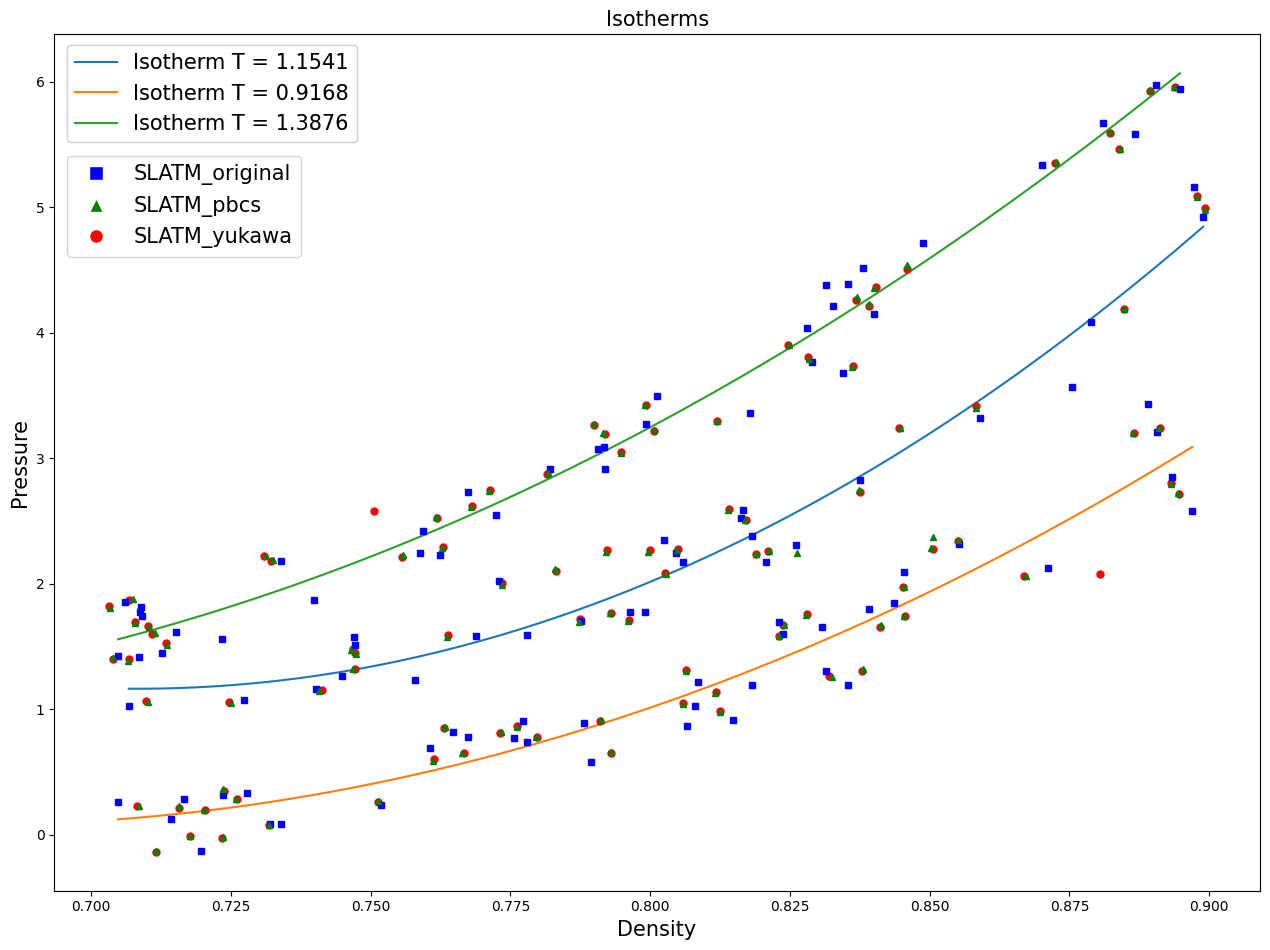

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.cluster.vq import kmeans

# Load the original data (simulation results)
df_original = pd.read_csv('/content/drive/MyDrive/total_therm_1250.csv')

# Load the predicted values for s1, s2, and s3
predicted_s1 = pd.read_csv('/content/drive/MyDrive/predicted_new_values_s1.csv')
predicted_s2 = pd.read_csv('/content/drive/MyDrive/predicted_new_values_s2.csv')
predicted_s3 = pd.read_csv('/content/drive/MyDrive/predicted_new_values_s3.csv')

# Identify accumulation points in the original data
p_original = df_original['avg_temp'].values
kmeans_model = kmeans(p_original, 3)
p1_original, p2_original, p3_original = kmeans_model[0]

# Calculate delta values for isobars based on original data
delta1_original = np.min([p1_original, np.std(p_original)]) / 2.5
delta2_original = np.min([p2_original, np.std(p_original)]) / 2.5
delta3_original = np.min([p3_original, np.std(p_original)]) / 2.5

# Define isobars based on original data
isobars = []
for p, delta in [(p1_original, delta1_original), (p3_original, delta3_original), (p2_original, delta2_original)]:
    isobar = [p - delta, p + delta]
    isobars.append(isobar)

# Filter data for each isobar and plot
fig, ax = plt.subplots(figsize=(12.8, 9.6))
colors = ['blue', 'green', 'red'] # Colors for s1, s2, s3

for i, isobar in enumerate(isobars):
    # Filter original data
    mask_original = (df_original['avg_temp'] >= isobar[0]) & (df_original['avg_temp'] <= isobar[1])
    filtered_df_original = df_original[mask_original]

    # Filter predicted data for s1, s2, and s3
    mask_predicted_s1 = (predicted_s1['predicted_avg_temp'] >= isobar[0]) & (predicted_s1['predicted_avg_temp'] <= isobar[1])
    filtered_df_predicted_s1 = predicted_s1[mask_predicted_s1]

    mask_predicted_s2 = (predicted_s2['predicted_avg_temp'] >= isobar[0]) & (predicted_s2['predicted_avg_temp'] <= isobar[1])
    filtered_df_predicted_s2 = predicted_s2[mask_predicted_s2]

    mask_predicted_s3 = (predicted_s3['predicted_avg_temp'] >= isobar[0]) & (predicted_s3['predicted_avg_temp'] <= isobar[1])
    filtered_df_predicted_s3 = predicted_s3[mask_predicted_s3]

    # Define a linear function to fit to the data
    def lin_func(x, a, b, c):
        return a * x**2 + b * x + c

    # Fit the linear function to the data
    popt_s1, pcov_s1 = curve_fit(lin_func, filtered_df_predicted_s1['predicted_density'], filtered_df_predicted_s1['predicted_avg_pressure'])

    # Plot the fitted curve for s1
    x_fit = np.linspace(filtered_df_predicted_s1['predicted_density'].min(), filtered_df_predicted_s1['predicted_density'].max(), 100)
    y_fit_s1 = lin_func(x_fit, *popt_s1)
    ax.plot(x_fit, y_fit_s1, label=f'Isotherm T = {(isobar[0]+isobar[1])/2:.4f}')
    #ax.plot(x_fit, y_fit_s1, color=colors[0], label=f'Fitted Curve (s1)')

    # Plot the predicted data points for s1, s2, and s3 with different markers and colors
    ax.plot(filtered_df_predicted_s3['predicted_density'], filtered_df_predicted_s3['predicted_avg_pressure'], 'o', markersize=5, color=colors[2])
    ax.plot(filtered_df_predicted_s1['predicted_density'], filtered_df_predicted_s1['predicted_avg_pressure'], 's', markersize=5, color=colors[0])
    ax.plot(filtered_df_predicted_s2['predicted_density'], filtered_df_predicted_s2['predicted_avg_pressure'], '^', markersize=5, color=colors[1])


# Create a customized legend
legend_markers = ax.legend(handles=[
    plt.Line2D([0], [0], marker='s', color='w', label='SLATM_original', markerfacecolor=colors[0], markersize=10),
    plt.Line2D([0], [0], marker='^', color='w', label='SLATM_pbcs', markerfacecolor=colors[1], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='SLATM_yukawa', markerfacecolor=colors[2], markersize=10),
], loc='upper left', bbox_to_anchor=(0.002, 0.87), fontsize='15')

# Add the customized legend to the plot
ax.add_artist(legend_markers)

# Add a title, labels, and legend
ax.set_title('Isotherms', fontsize='15')
ax.set_xlabel('Density', fontsize='15')
ax.set_ylabel('Pressure', fontsize='15')

# Create a customized legend
legend_isobar = ax.legend(loc='upper right', bbox_to_anchor=(0.26, 1.0), fontsize='15')

# Add the customized legend to the plot
ax.add_artist(legend_isobar)

plt.tight_layout()
plt.show()


   density  avg_temp  pressure  harm_pressure
0   0.7413    1.4444    2.2515         1.7448
1   0.8194    1.3602    3.5004         4.6074
2   0.8445    1.1197    2.9445         3.7574
3   0.7409    0.9035    0.2815         0.3832
4   0.8515    1.2119    3.6515         4.5857
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   density        500 non-null    float64
 1   avg_temp       500 non-null    float64
 2   pressure       500 non-null    float64
 3   harm_pressure  500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB
None
          density    avg_temp    pressure  harm_pressure
count  500.000000  500.000000  500.000000     500.000000
mean     0.797521    1.169987    2.359476       2.358120
std      0.057799    0.200547    1.441708       1.558630
min      0.700900    0.802100   -0.250000      -0.681600
25%      0.743975    0.98

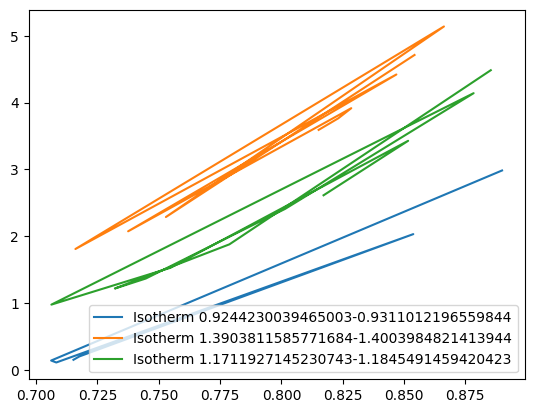

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/thermo.csv')

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Identify the accumulation points
from scipy.cluster.vq import kmeans
T = df['avg_temp'].values # Changed to 'avg_temp'
kmeans_model = kmeans(T, 3)
T1, T2, T3 = kmeans_model[0]

# Calculate the delta values for each isotherm
delta1 = np.min([T1, np.std(T)])/60
delta2 = np.min([T2, np.std(T)])/40
delta3 = np.min([T3, np.std(T)])/30

# Define the isotherms
isotherms = []
for T, delta in [(T1, delta1), (T2, delta2), (T3, delta3)]:
 isotherm = [T - delta, T + delta]
 isotherms.append(isotherm)

# Filter the data for each isotherm
for isotherm in isotherms:
 mask = (df['avg_temp'] >= isotherm[0]) & (df['avg_temp'] <= isotherm[1])
 filtered_df = df[mask]
 # Plot the density and pressure data for each isotherm
 plt.plot(filtered_df['density'], filtered_df['pressure'], label=f'Isotherm {isotherm[0]}-{isotherm[1]}')
plt.legend()
plt.show()


   density  avg_temp  pressure  harm_pressure
0   0.7413    1.4444    2.2515         1.7448
1   0.8194    1.3602    3.5004         4.6074
2   0.8445    1.1197    2.9445         3.7574
3   0.7409    0.9035    0.2815         0.3832
4   0.8515    1.2119    3.6515         4.5857
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   density        500 non-null    float64
 1   avg_temp       500 non-null    float64
 2   pressure       500 non-null    float64
 3   harm_pressure  500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB
None
          density    avg_temp    pressure  harm_pressure
count  500.000000  500.000000  500.000000     500.000000
mean     0.797521    1.169987    2.359476       2.358120
std      0.057799    0.200547    1.441708       1.558630
min      0.700900    0.802100   -0.250000      -0.681600
25%      0.743975    0.98

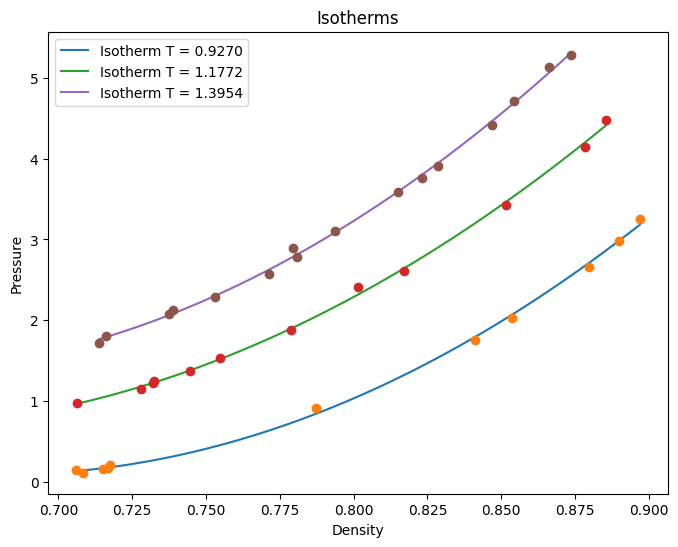

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/thermo.csv')

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Identify the accumulation points
from scipy.cluster.vq import kmeans
T = df['avg_temp'].values
kmeans_model = kmeans(T, 3)
T1, T2, T3 = kmeans_model[0]

# Calculate the delta values for each isotherm
delta1 = np.min([T1, np.std(T)])/20
delta2 = np.min([T2, np.std(T)])/20
delta3 = np.min([T3, np.std(T)])/20

# Define the isotherms
isotherms = []
for T, delta in [(T1, delta1), (T2, delta2), (T3, delta3)]:
 isotherm = [T - delta, T + delta]
 isotherms.append(isotherm)

# Filter the data for each isotherm and plot
fig, ax = plt.subplots(figsize=(8, 6))  # Create a single subplot

for i, isotherm in enumerate(isotherms):
    mask = (df['avg_temp'] >= isotherm[0]) & (df['avg_temp'] <= isotherm[1])
    filtered_df = df[mask]

    # Define a polynomial function to fit to the data
    def poly_func(x, a, b, c):
        return a * x**2 + b * x + c

    # Fit the polynomial function to the data
    popt, pcov = curve_fit(poly_func, filtered_df['density'], filtered_df['pressure'])

    # Plot the fitted curve and data points on the same axis
    x = np.linspace(filtered_df['density'].min(), filtered_df['density'].max(), 100)
    y = poly_func(x, *popt)
    ax.plot(x, y, label=f'Isotherm T = {(isotherm[0]+isotherm[1])/2:.4f}')
    ax.plot(filtered_df['density'], filtered_df['pressure'], 'o')
    #ax.plot(filtered_df['density'], filtered_df['pressure'], 'o', label=f'Data points for Isotherm {(isotherm[0]+isotherm[1])/2}')

# Add a title, labels, and legend
ax.set_title('Isotherms')
ax.set_xlabel('Density')
ax.set_ylabel('Pressure')
ax.legend()

plt.show()


   density  avg_temp  pressure  harm_pressure
0   0.7413    1.4444    2.2515         1.7448
1   0.8194    1.3602    3.5004         4.6074
2   0.8445    1.1197    2.9445         3.7574
3   0.7409    0.9035    0.2815         0.3832
4   0.8515    1.2119    3.6515         4.5857
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   density        500 non-null    float64
 1   avg_temp       500 non-null    float64
 2   pressure       500 non-null    float64
 3   harm_pressure  500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB
None
          density    avg_temp    pressure  harm_pressure
count  500.000000  500.000000  500.000000     500.000000
mean     0.797521    1.169987    2.359476       2.358120
std      0.057799    0.200547    1.441708       1.558630
min      0.700900    0.802100   -0.250000      -0.681600
25%      0.743975    0.98

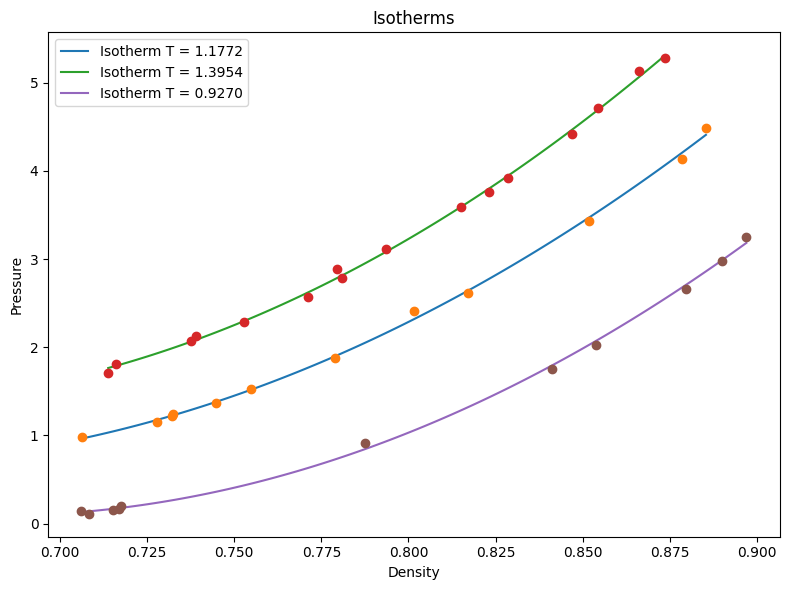

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/thermo.csv')

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Identify the accumulation points
from scipy.cluster.vq import kmeans
T = df['avg_temp'].values
kmeans_model = kmeans(T, 3)
T1, T2, T3 = kmeans_model[0]

# Calculate the delta values for each isotherm
delta1 = np.min([T1, np.std(T)])/20
delta2 = np.min([T2, np.std(T)])/20
delta3 = np.min([T3, np.std(T)])/20

# Define the isotherms
isotherms = []
for T, delta in [(T1, delta1), (T2, delta2), (T3, delta3)]:
    isotherm = [T - delta, T + delta]
    isotherms.append(isotherm)

# Filter the data for each isotherm and plot
fig, ax = plt.subplots(figsize=(8, 6))
for i, isotherm in enumerate(isotherms):
    mask = (df['avg_temp'] >= isotherm[0]) & (df['avg_temp'] <= isotherm[1])
    filtered_df = df[mask]

    # Define a polynomial function to fit to the data
    def poly_func(x, a, b, c):
        return a * x**2 + b * x + c

    # Fit the polynomial function to the data
    popt, pcov = curve_fit(poly_func, filtered_df['density'], filtered_df['pressure'])

    # Plot the fitted curve and data points on the same axis
    x = np.linspace(filtered_df['density'].min(), filtered_df['density'].max(), 100)
    y = poly_func(x, *popt)
    ax.plot(x, y, label=f'Isotherm T = {(isotherm[0]+isotherm[1])/2:.4f}')
    ax.plot(filtered_df['density'], filtered_df['pressure'], 'o')

# Add a title, labels, and legend
ax.set_title('Isotherms')
ax.set_xlabel('Density')
ax.set_ylabel('Pressure')
ax.legend()

plt.tight_layout()
plt.show()


   density  avg_temp  pressure  harm_pressure
0   0.7413    1.4444    2.2515         1.7448
1   0.8194    1.3602    3.5004         4.6074
2   0.8445    1.1197    2.9445         3.7574
3   0.7409    0.9035    0.2815         0.3832
4   0.8515    1.2119    3.6515         4.5857
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   density        500 non-null    float64
 1   avg_temp       500 non-null    float64
 2   pressure       500 non-null    float64
 3   harm_pressure  500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB
None
          density    avg_temp    pressure  harm_pressure
count  500.000000  500.000000  500.000000     500.000000
mean     0.797521    1.169987    2.359476       2.358120
std      0.057799    0.200547    1.441708       1.558630
min      0.700900    0.802100   -0.250000      -0.681600
25%      0.743975    0.98

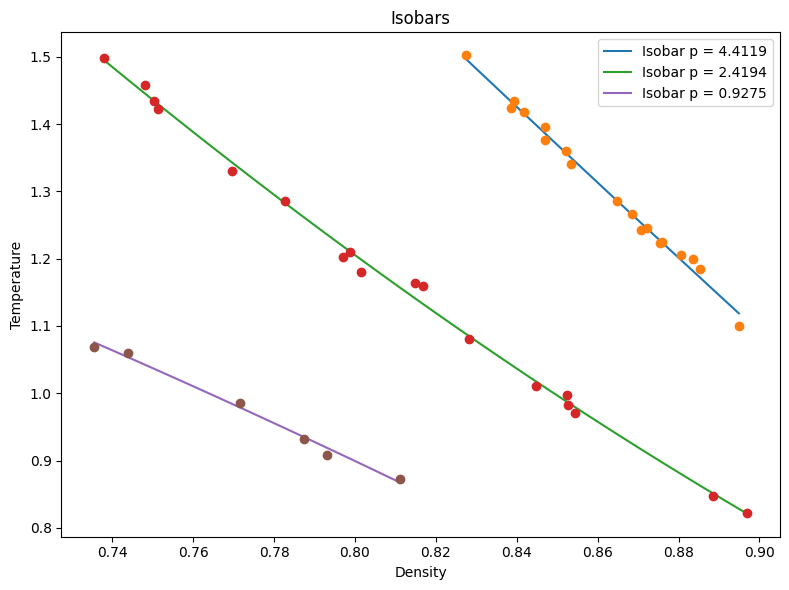

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/thermo.csv')

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Identify the accumulation points
from scipy.cluster.vq import kmeans
p = df['pressure'].values
kmeans_model = kmeans(p, 3)
p1, p2, p3 = kmeans_model[0]

# Calculate the delta values for each isobars
delta1 = np.min([p1, np.std(p)])/20
delta2 = np.min([p2, np.std(p)])/20
delta3 = np.min([p3, np.std(p)])/30

# Define the isobars
isobars = []
for p, delta in [(p1, delta1), (p2, delta2), (p3, delta3)]:
    isobar = [p - delta, p + delta]
    isobars.append(isobar)

# Filter the data for each isobar and plot
fig, ax = plt.subplots(figsize=(8, 6))
for i, isobar in enumerate(isobars):
    mask = (df['pressure'] >= isobar[0]) & (df['pressure'] <= isobar[1])
    filtered_df = df[mask]

    # Define a polynomial function to fit to the data
    def poly_func(x, a, b, c):
        return a * x**2 + b * x + c

    # Fit the polynomial function to the data
    popt, pcov = curve_fit(poly_func, filtered_df['density'], filtered_df['avg_temp'])

    # Plot the fitted curve and data points on the same axis
    x = np.linspace(filtered_df['density'].min(), filtered_df['density'].max(), 100)
    y = poly_func(x, *popt)
    ax.plot(x, y, label=f'Isobar p = {(isobar[0]+isobar[1])/2:.4f}')
    ax.plot(filtered_df['density'], filtered_df['avg_temp'], 'o')

# Add a title, labels, and legend
ax.set_title('Isobars')
ax.set_xlabel('Density')
ax.set_ylabel('Temperature')
ax.legend()

plt.tight_layout()
plt.show()


   predicted_density  predicted_avg_temp  predicted_avg_pressure  \
0           0.803000            1.455846                3.609235   
1           0.754039            1.110365                1.216398   
2           0.866003            1.409600                5.112300   
3           0.761702            1.394942                2.503820   
4           0.862069            1.246902                4.048685   

   predicted_avg_harm_pressure  
0                     3.438484  
1                     1.230509  
2                     4.933178  
3                     2.493820  
4                     4.085849  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   predicted_density            100 non-null    float64
 1   predicted_avg_temp           100 non-null    float64
 2   predicted_avg_pressure       100 non-null    float64


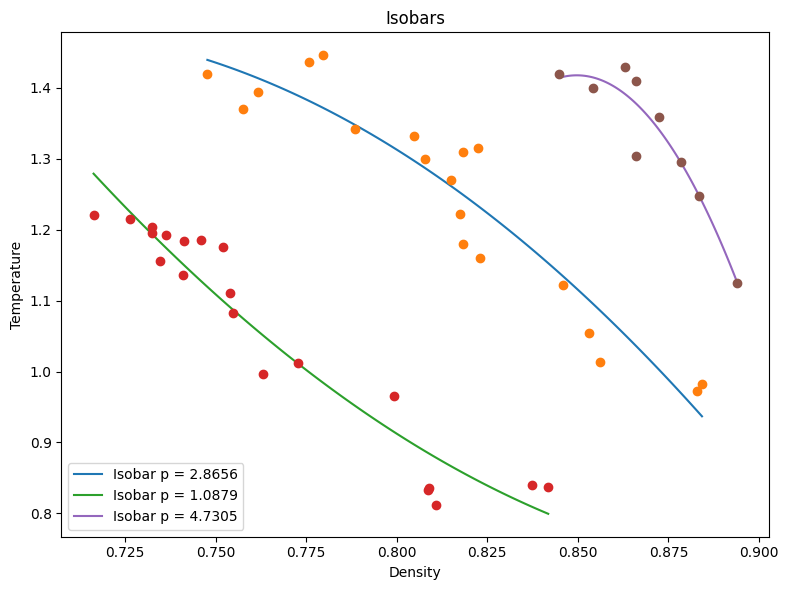

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/predicted_values_s3.csv')

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Identify the accumulation points
from scipy.cluster.vq import kmeans
p = df['predicted_avg_pressure'].values
kmeans_model = kmeans(p, 3)
p1, p2, p3 = kmeans_model[0]

# Calculate the delta values for each isobars
delta1 = np.min([p1, np.std(p)])/3
delta2 = np.min([p2, np.std(p)])/3
delta3 = np.min([p3, np.std(p)])/3

# Define the isobars
isobars = []
for p, delta in [(p1, delta1), (p2, delta2), (p3, delta3)]:
    isobar = [p - delta, p + delta]
    isobars.append(isobar)

# Filter the data for each isobar and plot
fig, ax = plt.subplots(figsize=(8, 6))
for i, isobar in enumerate(isobars):
    mask = (df['predicted_avg_pressure'] >= isobar[0]) & (df['predicted_avg_pressure'] <= isobar[1])
    filtered_df = df[mask]

    # Define a linear function to fit to the data
    def lin_func(x, a, b, c):
        return a * x**2 + b * x + c

    # Fit the linear function to the data
    popt, pcov = curve_fit(lin_func, filtered_df['predicted_density'], filtered_df['predicted_avg_temp'])

    # Plot the fitted curve and data points on the same axis
    x = np.linspace(filtered_df['predicted_density'].min(), filtered_df['predicted_density'].max(), 100)
    y = lin_func(x, *popt)
    ax.plot(x, y, label=f'Isobar p = {(isobar[0]+isobar[1])/2:.4f}')
    ax.plot(filtered_df['predicted_density'], filtered_df['predicted_avg_temp'], 'o')

# Add a title, labels, and legend
ax.set_title('Isobars')
ax.set_xlabel('Density')
ax.set_ylabel('Temperature')
ax.legend()

plt.tight_layout()
plt.show()


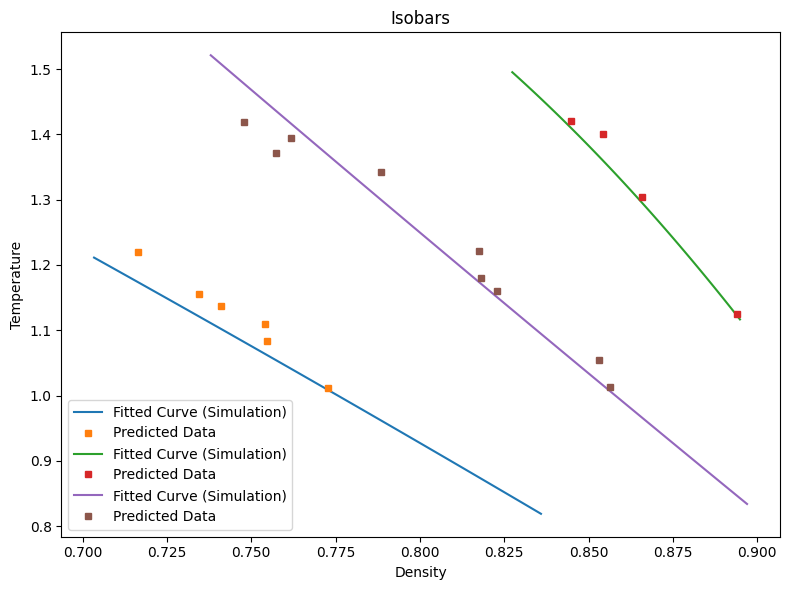

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.cluster.vq import kmeans

# Load the original data (simulation results)
df_original = pd.read_csv('/content/drive/MyDrive/thermo.csv')

# Load the predicted values for s3
predicted_s3 = pd.read_csv('/content/drive/MyDrive/predicted_values_s3.csv')

# Identify accumulation points in the original data
p_original = df_original['pressure'].values
kmeans_model = kmeans(p_original, 3)
p1_original, p2_original, p3_original = kmeans_model[0]

# Calculate delta values for isobars based on original data
delta1_original = np.min([p1_original, np.std(p_original)]) / 6
delta2_original = np.min([p2_original, np.std(p_original)]) / 6
delta3_original = np.min([p3_original, np.std(p_original)]) / 6

# Define isobars based on original data
isobars = []
for p, delta in [(p1_original, delta1_original), (p2_original, delta2_original), (p3_original, delta3_original)]:
    isobar = [p - delta, p + delta]
    isobars.append(isobar)

# Filter both original and predicted data for each isobar and plot
fig, ax = plt.subplots(figsize=(8, 6))
for i, isobar in enumerate(isobars):
    # Filter original data
    mask_original = (df_original['pressure'] >= isobar[0]) & (df_original['pressure'] <= isobar[1])
    filtered_df_original = df_original[mask_original]

    # Filter predicted data
    mask_predicted = (predicted_s3['predicted_avg_pressure'] >= isobar[0]) & (predicted_s3['predicted_avg_pressure'] <= isobar[1])
    filtered_df_predicted = predicted_s3[mask_predicted]

    # Define a polynomial function to fit to the data
    def poly_func(x, a, b, c):
        return a * x**2 + b * x + c

    # Fit the polynomial function to the original data
    popt_original, pcov_original = curve_fit(poly_func, filtered_df_original['density'], filtered_df_original['avg_temp'])

    # Plot the fitted curve for original data
    x_curve_original = np.linspace(filtered_df_original['density'].min(), filtered_df_original['density'].max(), 100)
    y_curve_original = poly_func(x_curve_original, *popt_original)
    ax.plot(x_curve_original, y_curve_original, label=f'Fitted Curve (Simulation)')

    # Plot the original data points
    #ax.plot(filtered_df_original['density'], filtered_df_original['avg_temp'], 'o', markersize=3, label='Simulation Data')

    # Plot the predicted data points
    ax.plot(filtered_df_predicted['predicted_density'], filtered_df_predicted['predicted_avg_temp'], 's', markersize=5, label=f'Predicted Data')

# Add a title, labels, and legend
ax.set_title('Isobars')
ax.set_xlabel('Density')
ax.set_ylabel('Temperature')
ax.legend()

plt.tight_layout()
plt.show()

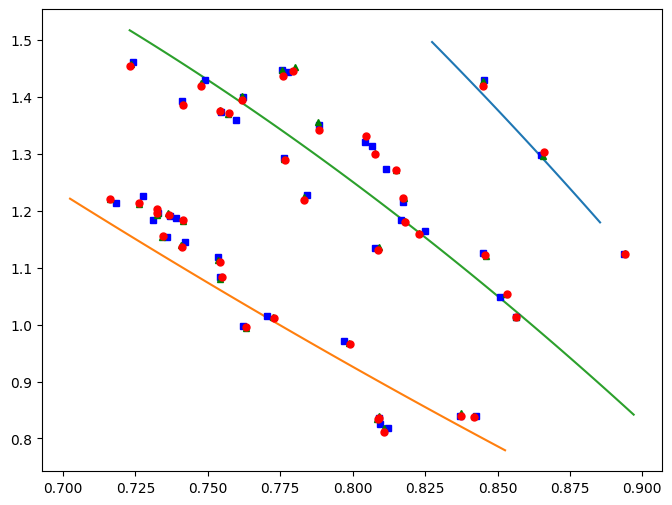

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.cluster.vq import kmeans

# Load the original data (simulation results)
df_original = pd.read_csv('/content/drive/MyDrive/thermo.csv')

# Load the predicted values for s1, s2, and s3
predicted_s1 = pd.read_csv('/content/drive/MyDrive/predicted_values_s1.csv')
predicted_s2 = pd.read_csv('/content/drive/MyDrive/predicted_values_s2.csv')
predicted_s3 = pd.read_csv('/content/drive/MyDrive/predicted_values_s3.csv')

# Identify accumulation points in the original data
p_original = df_original['pressure'].values
kmeans_model = kmeans(p_original, 3)
p1_original, p2_original, p3_original = kmeans_model[0]

# Calculate delta values for isobars based on original data
delta1_original = np.min([p1_original, np.std(p_original)]) / 10
delta2_original = np.min([p2_original, np.std(p_original)]) / 3
delta3_original = np.min([p3_original, np.std(p_original)]) / 3

# Define isobars based on original data
isobars = []
for p, delta in [(p1_original, delta1_original), (p2_original, delta2_original), (p3_original, delta3_original)]:
    isobar = [p - delta, p + delta]
    isobars.append(isobar)

# Filter data for each isobar and plot
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'green', 'red']  # Colors for s1, s2, s3

for i, isobar in enumerate(isobars):
    # Filter original data
    mask_original = (df_original['pressure'] >= isobar[0]) & (df_original['pressure'] <= isobar[1])
    filtered_df_original = df_original[mask_original]

    # Filter predicted data for s1, s2, and s3
    mask_predicted_s1 = (predicted_s1['predicted_avg_pressure'] >= isobar[0]) & (predicted_s1['predicted_avg_pressure'] <= isobar[1])
    filtered_df_predicted_s1 = predicted_s1[mask_predicted_s1]

    mask_predicted_s2 = (predicted_s2['predicted_avg_pressure'] >= isobar[0]) & (predicted_s2['predicted_avg_pressure'] <= isobar[1])
    filtered_df_predicted_s2 = predicted_s2[mask_predicted_s2]

    mask_predicted_s3 = (predicted_s3['predicted_avg_pressure'] >= isobar[0]) & (predicted_s3['predicted_avg_pressure'] <= isobar[1])
    filtered_df_predicted_s3 = predicted_s3[mask_predicted_s3]

    # Define a polynomial function to fit to the data
    def poly_func(x, a, b, c):
        return a * x**2 + b * x + c

    # Fit the polynomial function to the original data
    popt_original, pcov_original = curve_fit(poly_func, filtered_df_original['density'], filtered_df_original['avg_temp'])

    # Plot the fitted curve for original data
    x_curve_original = np.linspace(filtered_df_original['density'].min(), filtered_df_original['density'].max(), 100)
    y_curve_original = poly_func(x_curve_original, *popt_original)
    ax.plot(x_curve_original, y_curve_original, label=f'Fitted Curve (Simulation)')

    # Define a polynomial function to fit to the data (optional)
    # ... (code for fitting if needed)

    # Plot the fitted curve for original data (optional)
    # ... (code for plotting the fitted curve)

    # Plot the original data points (optional)
    #ax.plot(filtered_df_original['density'], filtered_df_original['avg_temp'], 'o', markersize=3, label='Simulation Data')

    # Plot the predicted data points for s1, s2, and s3 with different markers and colors
    ax.plot(filtered_df_predicted_s1['predicted_density'], filtered_df_predicted_s1['predicted_avg_temp'], 's', markersize=5, color=colors[0], label=f'Predicted Data (s1)')
    ax.plot(filtered_df_predicted_s2['predicted_density'], filtered_df_predicted_s2['predicted_avg_temp'], '^', markersize=5, color=colors[1], label=f'Predicted Data (s2)')
    ax.plot(filtered_df_predicted_s3['predicted_density'], filtered_df_predicted_s3['predicted_avg_temp'], 'o', markersize=5, color=colors[2], label=f'Predicted Data (s3)')

   predicted_density  predicted_avg_temp  predicted_avg_pressure  \
0           0.803000            1.455846                3.609235   
1           0.754039            1.110365                1.216398   
2           0.866003            1.409600                5.112300   
3           0.761702            1.394942                2.503820   
4           0.862069            1.246902                4.048685   

   predicted_avg_harm_pressure  
0                     3.438484  
1                     1.230509  
2                     4.933178  
3                     2.493820  
4                     4.085849  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   predicted_density            100 non-null    float64
 1   predicted_avg_temp           100 non-null    float64
 2   predicted_avg_pressure       100 non-null    float64


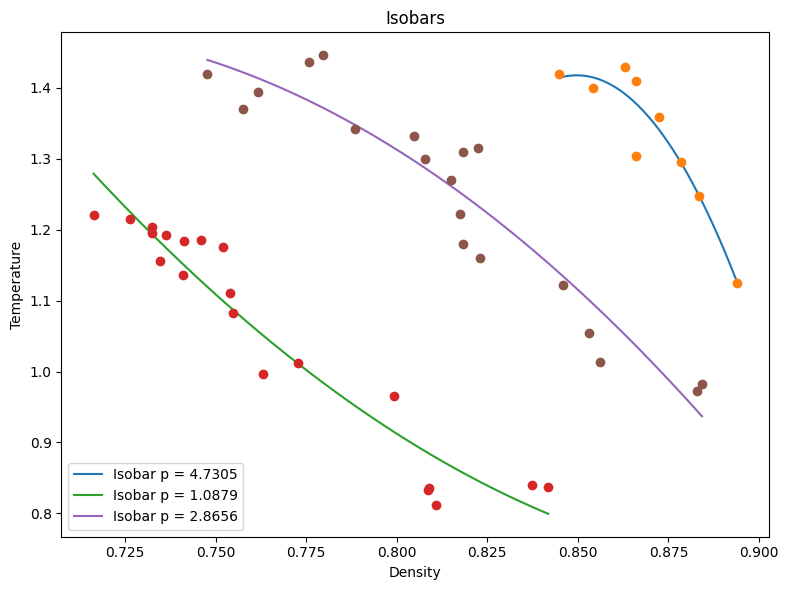

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/predicted_values_s3.csv')
predicted_s1 = pd.read_csv('/content/drive/MyDrive/predicted_values_s1.csv')
predicted_s2 = pd.read_csv('/content/drive/MyDrive/predicted_values_s2.csv')
predicted_s3 = pd.read_csv('/content/drive/MyDrive/predicted_values_s3.csv')

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Identify the accumulation points
from scipy.cluster.vq import kmeans
p = df['predicted_avg_pressure'].values
kmeans_model = kmeans(p, 3)
p1, p2, p3 = kmeans_model[0]

# Calculate the delta values for each isobars
delta1 = np.min([p1, np.std(p)])/3
delta2 = np.min([p2, np.std(p)])/3
delta3 = np.min([p3, np.std(p)])/3

# Define the isobars
isobars = []
for p, delta in [(p1, delta1), (p2, delta2), (p3, delta3)]:
    isobar = [p - delta, p + delta]
    isobars.append(isobar)

# Filter the data for each isobar and plot
fig, ax = plt.subplots(figsize=(8, 6))
for i, isobar in enumerate(isobars):
    mask = (df['predicted_avg_pressure'] >= isobar[0]) & (df['predicted_avg_pressure'] <= isobar[1])
    filtered_df = df[mask]

    # Define a linear function to fit to the data
    def lin_func(x, a, b, c):
        return a * x**2 + b * x + c

    # Fit the linear function to the data
    popt, pcov = curve_fit(lin_func, filtered_df['predicted_density'], filtered_df['predicted_avg_temp'])

    # Plot the fitted curve and data points on the same axis
    x = np.linspace(filtered_df['predicted_density'].min(), filtered_df['predicted_density'].max(), 100)
    y = lin_func(x, *popt)
    ax.plot(x, y, label=f'Isobar p = {(isobar[0]+isobar[1])/2:.4f}')
    ax.plot(filtered_df['predicted_density'], filtered_df['predicted_avg_temp'], 'o')

# Add a title, labels, and legend
ax.set_title('Isobars')
ax.set_xlabel('\rho')
ax.set_ylabel('T')
ax.legend()

plt.tight_layout()
plt.show()


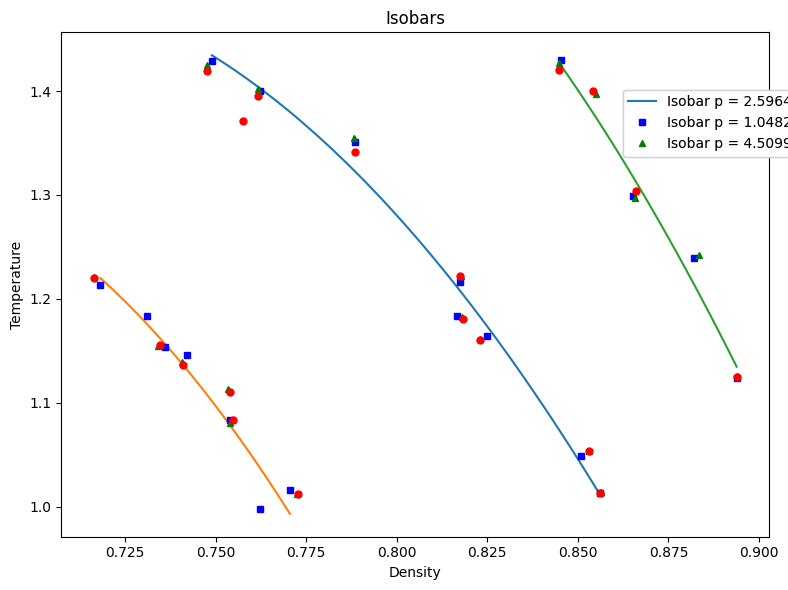

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.cluster.vq import kmeans

# Load the original data (simulation results)
df_original = pd.read_csv('/content/drive/MyDrive/thermo.csv')

# Load the predicted values for s1, s2, and s3
predicted_s1 = pd.read_csv('/content/drive/MyDrive/predicted_values_s1.csv')
predicted_s2 = pd.read_csv('/content/drive/MyDrive/predicted_values_s2.csv')
predicted_s3 = pd.read_csv('/content/drive/MyDrive/predicted_values_s3.csv')

# Identify accumulation points in the original data
p_original = df_original['pressure'].values
kmeans_model = kmeans(p_original, 3)
p1_original, p2_original, p3_original = kmeans_model[0]

# Calculate delta values for isobars based on original data
delta1_original = np.min([p1_original, np.std(p_original)]) / 6
delta2_original = np.min([p2_original, np.std(p_original)]) / 6
delta3_original = np.min([p3_original, np.std(p_original)]) / 6

# Define isobars based on original data
isobars = []
for p, delta in [(p1_original, delta1_original), (p2_original, delta2_original), (p3_original, delta3_original)]:
 isobar = [p - delta, p + delta]
 isobars.append(isobar)

# Filter data for each isobar and plot
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'green', 'red'] # Colors for s1, s2, s3

for i, isobar in enumerate(isobars):
 # Filter original data
 mask_original = (df_original['pressure'] >= isobar[0]) & (df_original['pressure'] <= isobar[1])
 filtered_df_original = df_original[mask_original]

 # Filter predicted data for s1, s2, and s3
 mask_predicted_s1 = (predicted_s1['predicted_avg_pressure'] >= isobar[0]) & (predicted_s1['predicted_avg_pressure'] <= isobar[1])
 filtered_df_predicted_s1 = predicted_s1[mask_predicted_s1]

 mask_predicted_s2 = (predicted_s2['predicted_avg_pressure'] >= isobar[0]) & (predicted_s2['predicted_avg_pressure'] <= isobar[1])
 filtered_df_predicted_s2 = predicted_s2[mask_predicted_s2]

 mask_predicted_s3 = (predicted_s3['predicted_avg_pressure'] >= isobar[0]) & (predicted_s3['predicted_avg_pressure'] <= isobar[1])
 filtered_df_predicted_s3 = predicted_s3[mask_predicted_s3]

 # Define a linear function to fit to the data
 def lin_func(x, a, b, c):
  return a * x**2 + b * x + c

 # Fit the linear function to the data
 popt_s1, pcov_s1 = curve_fit(lin_func, filtered_df_predicted_s1['predicted_density'], filtered_df_predicted_s1['predicted_avg_temp'])

 # Plot the fitted curve for s1
 x_fit = np.linspace(filtered_df_predicted_s1['predicted_density'].min(), filtered_df_predicted_s1['predicted_density'].max(), 100)
 y_fit_s1 = lin_func(x_fit, *popt_s1)
 ax.plot(x_fit, y_fit_s1, label=f'Isobar p = {(isobar[0]+isobar[1])/2:.4f}')

 # Plot the predicted data points for s1, s2, and s3 with different markers and colors
 ax.plot(filtered_df_predicted_s1['predicted_density'], filtered_df_predicted_s1['predicted_avg_temp'], 's', markersize=5, color=colors[0])
 ax.plot(filtered_df_predicted_s2['predicted_density'], filtered_df_predicted_s2['predicted_avg_temp'], '^', markersize=5, color=colors[1])
 ax.plot(filtered_df_predicted_s3['predicted_density'], filtered_df_predicted_s3['predicted_avg_temp'], 'o', markersize=5, color=colors[2])

# Create a customized legend for the markers
legend1 = ax.legend(handles=[
 plt.Line2D([0], [0], marker='s', color='w', label='SLATM_org', markerfacecolor=colors[0], markersize=5),
 plt.Line2D([0], [0], marker='^', color='w', label='SLATM_pbcs', markerfacecolor=colors[1], markersize=5),
 plt.Line2D([0], [0], marker='o', color='w', label='SLATM_yukawa', markerfacecolor=colors[2], markersize=5),
], loc='upper left', bbox_to_anchor=(1.05, 1))

# Add the first legend to the plot
ax.add_artist(legend1)

# Create a list of labels for the isobars
isobar_labels = [f'Isobar p = {(isobar[0]+isobar[1])/2:.4f}' for isobar in isobars]

# Create a customized legend for the isobars
legend2 = ax.legend(isobar_labels, loc='upper right', bbox_to_anchor=(1.05, 0.9))

# Add the second legend to the plot
ax.add_artist(legend2)

# Add a title, labels
ax.set_title('Isobars')
ax.set_xlabel('Density')
ax.set_ylabel('Temperature')

plt.tight_layout()
plt.show()


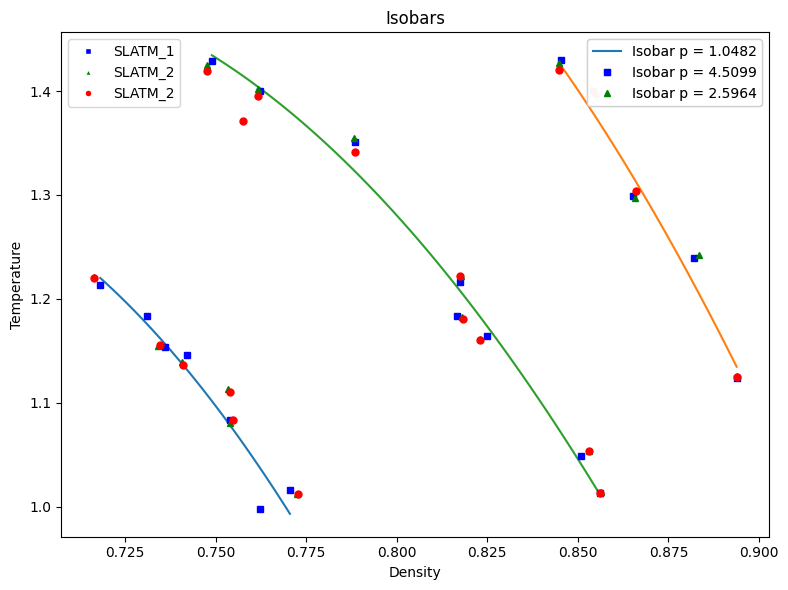

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.cluster.vq import kmeans

# Load the original data (simulation results)
df_original = pd.read_csv('/content/drive/MyDrive/thermo.csv')

# Load the predicted values for s1, s2, and s3
predicted_s1 = pd.read_csv('/content/drive/MyDrive/predicted_values_s1.csv')
predicted_s2 = pd.read_csv('/content/drive/MyDrive/predicted_values_s2.csv')
predicted_s3 = pd.read_csv('/content/drive/MyDrive/predicted_values_s3.csv')

# Identify accumulation points in the original data
p_original = df_original['pressure'].values
kmeans_model = kmeans(p_original, 3)
p1_original, p2_original, p3_original = kmeans_model[0]

# Calculate delta values for isobars based on original data
delta1_original = np.min([p1_original, np.std(p_original)]) / 6
delta2_original = np.min([p2_original, np.std(p_original)]) / 6
delta3_original = np.min([p3_original, np.std(p_original)]) / 6

# Define isobars based on original data
isobars = []
for p, delta in [(p1_original, delta1_original), (p2_original, delta2_original), (p3_original, delta3_original)]:
 isobar = [p - delta, p + delta]
 isobars.append(isobar)

# Filter data for each isobar and plot
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'green', 'red'] # Colors for s1, s2, s3

for i, isobar in enumerate(isobars):
 # Filter original data
 mask_original = (df_original['pressure'] >= isobar[0]) & (df_original['pressure'] <= isobar[1])
 filtered_df_original = df_original[mask_original]

 # Filter predicted data for s1, s2, and s3
 mask_predicted_s1 = (predicted_s1['predicted_avg_pressure'] >= isobar[0]) & (predicted_s1['predicted_avg_pressure'] <= isobar[1])
 filtered_df_predicted_s1 = predicted_s1[mask_predicted_s1]

 mask_predicted_s2 = (predicted_s2['predicted_avg_pressure'] >= isobar[0]) & (predicted_s2['predicted_avg_pressure'] <= isobar[1])
 filtered_df_predicted_s2 = predicted_s2[mask_predicted_s2]

 mask_predicted_s3 = (predicted_s3['predicted_avg_pressure'] >= isobar[0]) & (predicted_s3['predicted_avg_pressure'] <= isobar[1])
 filtered_df_predicted_s3 = predicted_s3[mask_predicted_s3]

 # Define a linear function to fit to the data
 def lin_func(x, a, b, c):
  return a * x**2 + b * x + c

 # Fit the linear function to the data
 popt_s1, pcov_s1 = curve_fit(lin_func, filtered_df_predicted_s1['predicted_density'], filtered_df_predicted_s1['predicted_avg_temp'])

 # Plot the fitted curve for s1
 x_fit = np.linspace(filtered_df_predicted_s1['predicted_density'].min(), filtered_df_predicted_s1['predicted_density'].max(), 100)
 y_fit_s1 = lin_func(x_fit, *popt_s1)
 ax.plot(x_fit, y_fit_s1)

 # Plot the predicted data points for s1, s2, and s3 with different markers and colors
 ax.plot(filtered_df_predicted_s1['predicted_density'], filtered_df_predicted_s1['predicted_avg_temp'], 's', markersize=5, color=colors[0])
 ax.plot(filtered_df_predicted_s2['predicted_density'], filtered_df_predicted_s2['predicted_avg_temp'], '^', markersize=5, color=colors[1])
 ax.plot(filtered_df_predicted_s3['predicted_density'], filtered_df_predicted_s3['predicted_avg_temp'], 'o', markersize=5, color=colors[2])

# Create a list of labels for the isobars
isobar_labels = [f'Isobar p = {(isobar[0]+isobar[1])/2:.4f}' for isobar in isobars]

# Create a customized legend for the markers
legend1 = ax.legend(handles=[
 plt.Line2D([0], [0], marker='s', color='w', label='SLATM_1', markerfacecolor=colors[0], markersize=5),
 plt.Line2D([0], [0], marker='^', color='w', label='SLATM_2', markerfacecolor=colors[1], markersize=5),
 plt.Line2D([0], [0], marker='o', color='w', label='SLATM_2', markerfacecolor=colors[2], markersize=5),
], loc='upper left', bbox_to_anchor=(0, 1))

# Add the first legend to the plot
ax.add_artist(legend1)

# Create a customized legend for the isobars
legend2 = ax.legend(isobar_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Add the second legend to the plot
ax.add_artist(legend2)

# Add a title, labels
ax.set_title('Isobars')
ax.set_xlabel('Density')
ax.set_ylabel('Temperature')

plt.tight_layout()
plt.show()


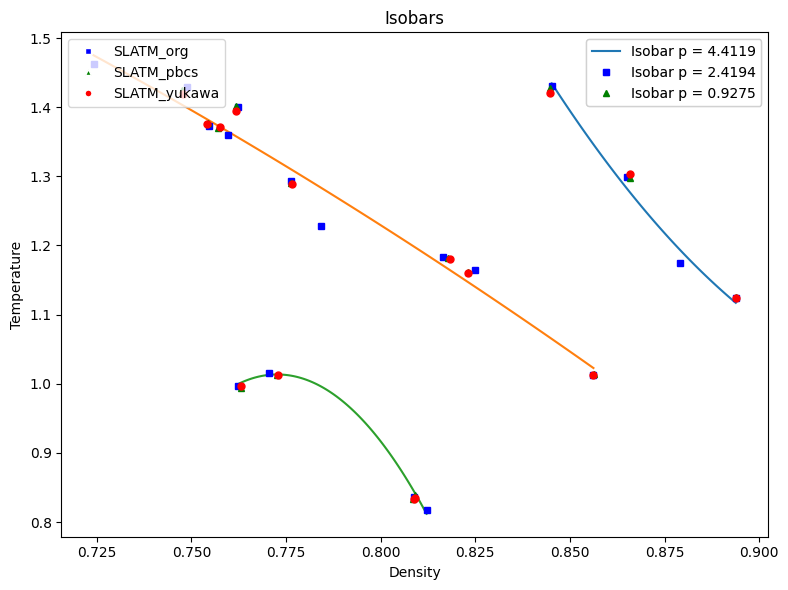

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.cluster.vq import kmeans

# Load the original data (simulation results)
df_original = pd.read_csv('/content/drive/MyDrive/thermo.csv')

# Load the predicted values for s1, s2, and s3
predicted_s1 = pd.read_csv('/content/drive/MyDrive/predicted_values_s1.csv')
predicted_s2 = pd.read_csv('/content/drive/MyDrive/predicted_values_s2.csv')
predicted_s3 = pd.read_csv('/content/drive/MyDrive/predicted_values_s3.csv')

# Identify accumulation points in the original data
p_original = df_original['pressure'].values
kmeans_model = kmeans(p_original, 3)
p1_original, p2_original, p3_original = kmeans_model[0]

# Calculate delta values for isobars based on original data
delta1_original = np.min([p1_original, np.std(p_original)]) / 6
delta2_original = np.min([p2_original, np.std(p_original)]) / 6
delta3_original = np.min([p3_original, np.std(p_original)]) / 6

# Define isobars based on original data
isobars = []
for p, delta in [(p1_original, delta1_original), (p2_original, delta2_original), (p3_original, delta3_original)]:
 isobar = [p - delta, p + delta]
 isobars.append(isobar)

# Filter data for each isobar and plot
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'green', 'red'] # Colors for s1, s2, s3

for i, isobar in enumerate(isobars):
 # Filter original data
 mask_original = (df_original['pressure'] >= isobar[0]) & (df_original['pressure'] <= isobar[1])
 filtered_df_original = df_original[mask_original]

 # Filter predicted data for s1, s2, and s3
 mask_predicted_s1 = (predicted_s1['predicted_avg_pressure'] >= isobar[0]) & (predicted_s1['predicted_avg_pressure'] <= isobar[1])
 filtered_df_predicted_s1 = predicted_s1[mask_predicted_s1]

 mask_predicted_s2 = (predicted_s2['predicted_avg_pressure'] >= isobar[0]) & (predicted_s2['predicted_avg_pressure'] <= isobar[1])
 filtered_df_predicted_s2 = predicted_s2[mask_predicted_s2]

 mask_predicted_s3 = (predicted_s3['predicted_avg_pressure'] >= isobar[0]) & (predicted_s3['predicted_avg_pressure'] <= isobar[1])
 filtered_df_predicted_s3 = predicted_s3[mask_predicted_s3]

 # Define a linear function to fit to the data
 def lin_func(x, a, b, c):return a * x**2 + b * x + c

 # Fit the linear function to the data
 popt_s1, pcov_s1 = curve_fit(lin_func, filtered_df_predicted_s1['predicted_density'], filtered_df_predicted_s1['predicted_avg_temp'])

 # Plot the fitted curve for s1
 x_fit = np.linspace(filtered_df_predicted_s1['predicted_density'].min(), filtered_df_predicted_s1['predicted_density'].max(), 100)
 y_fit_s1 = lin_func(x_fit, *popt_s1)
 ax.plot(x_fit, y_fit_s1)

 # Plot the predicted data points for s1, s2, and s3 with different markers and colors
 ax.plot(filtered_df_predicted_s1['predicted_density'], filtered_df_predicted_s1['predicted_avg_temp'], 's', markersize=5, color=colors[0])
 ax.plot(filtered_df_predicted_s2['predicted_density'], filtered_df_predicted_s2['predicted_avg_temp'], '^', markersize=5, color=colors[1])
 ax.plot(filtered_df_predicted_s3['predicted_density'], filtered_df_predicted_s3['predicted_avg_temp'], 'o', markersize=5, color=colors[2])

# Create a list of labels for the isobars
isobar_labels = [f'Isobar p = {(isobar[0]+isobar[1])/2:.4f}' for isobar in isobars]

# Create a customized legend for the markers
legend1 = ax.legend(handles=[
 plt.Line2D([0], [0], marker='s', color='w', label='SLATM_org', markerfacecolor=colors[0], markersize=5),
 plt.Line2D([0], [0], marker='^', color='w', label='SLATM_pbcs', markerfacecolor=colors[1], markersize=5),
 plt.Line2D([0], [0], marker='o', color='w', label='SLATM_yukawa', markerfacecolor=colors[2], markersize=5),
], loc='upper left', bbox_to_anchor=(0, 1))

# Add the first legend to the plot
ax.add_artist(legend1)

# Create a customized legend for the isobars
legend2 = ax.legend(isobar_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Add the second legend to the plot
ax.add_artist(legend2)

# Add a title, labels
ax.set_title('Isobars')
ax.set_xlabel('Density')
ax.set_ylabel('Temperature')

plt.tight_layout()
plt.show()


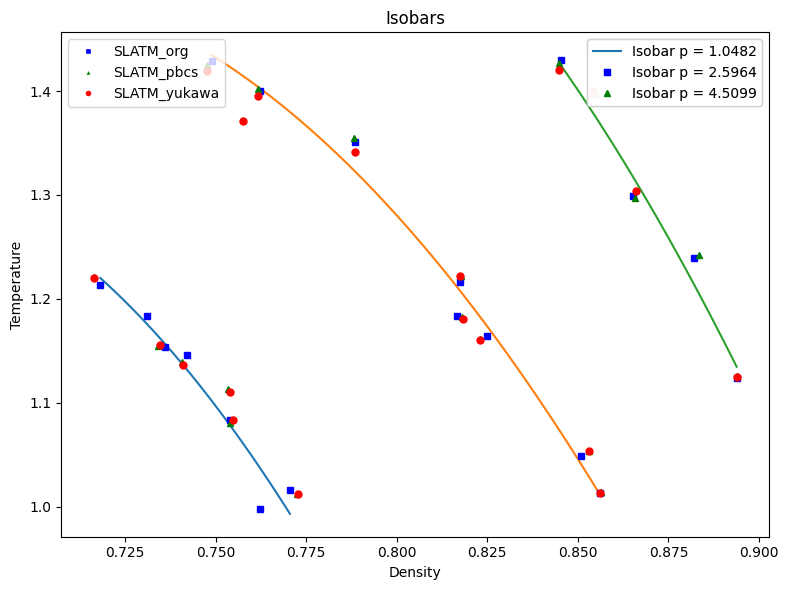

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.cluster.vq import kmeans

# Load the original data (simulation results)
df_original = pd.read_csv('/content/drive/MyDrive/thermo.csv')

# Load the predicted values for s1, s2, and s3
predicted_s1 = pd.read_csv('/content/drive/MyDrive/predicted_values_s1.csv')
predicted_s2 = pd.read_csv('/content/drive/MyDrive/predicted_values_s2.csv')
predicted_s3 = pd.read_csv('/content/drive/MyDrive/predicted_values_s3.csv')

# Identify accumulation points in the original data
p_original = df_original['pressure'].values
kmeans_model = kmeans(p_original, 3)
p1_original, p2_original, p3_original = kmeans_model[0]

# Calculate delta values for isobars based on original data
delta1_original = np.min([p1_original, np.std(p_original)]) / 6
delta2_original = np.min([p2_original, np.std(p_original)]) / 6
delta3_original = np.min([p3_original, np.std(p_original)]) / 6

# Define isobars based on original data
isobars = []
for p, delta in [(p1_original, delta1_original), (p2_original, delta2_original), (p3_original, delta3_original)]:
 isobar = [p - delta, p + delta]
 isobars.append(isobar)

# Filter data for each isobar and plot
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'green', 'red'] # Colors for s1, s2, s3

for i, isobar in enumerate(isobars):
 # Filter original data
 mask_original = (df_original['pressure'] >= isobar[0]) & (df_original['pressure'] <= isobar[1])
 filtered_df_original = df_original[mask_original]

 # Filter predicted data for s1, s2, and s3
 mask_predicted_s1 = (predicted_s1['predicted_avg_pressure'] >= isobar[0]) & (predicted_s1['predicted_avg_pressure'] <= isobar[1])
 filtered_df_predicted_s1 = predicted_s1[mask_predicted_s1]

 mask_predicted_s2 = (predicted_s2['predicted_avg_pressure'] >= isobar[0]) & (predicted_s2['predicted_avg_pressure'] <= isobar[1])
 filtered_df_predicted_s2 = predicted_s2[mask_predicted_s2]

 mask_predicted_s3 = (predicted_s3['predicted_avg_pressure'] >= isobar[0]) & (predicted_s3['predicted_avg_pressure'] <= isobar[1])
 filtered_df_predicted_s3 = predicted_s3[mask_predicted_s3]

 # Define a linear function to fit to the data
 def lin_func(x, a, b, c):
  return a * x**2 + b * x + c

 # Fit the linear function to the data
 popt_s1, pcov_s1 = curve_fit(lin_func, filtered_df_predicted_s1['predicted_density'], filtered_df_predicted_s1['predicted_avg_temp'])

 # Plot the fitted curve for s1
 x_fit = np.linspace(filtered_df_predicted_s1['predicted_density'].min(), filtered_df_predicted_s1['predicted_density'].max(), 100)
 y_fit_s1 = lin_func(x_fit, *popt_s1)
 ax.plot(x_fit, y_fit_s1)

 # Plot the predicted data points for s1, s2, and s3 with different markers and colors
 ax.plot(filtered_df_predicted_s1['predicted_density'], filtered_df_predicted_s1['predicted_avg_temp'], 's', markersize=5, color=colors[0])
 ax.plot(filtered_df_predicted_s2['predicted_density'], filtered_df_predicted_s2['predicted_avg_temp'], '^', markersize=5, color=colors[1])
 ax.plot(filtered_df_predicted_s3['predicted_density'], filtered_df_predicted_s3['predicted_avg_temp'], 'o', markersize=5, color=colors[2])

# Create a list of labels for the isobars
isobar_labels = [f'Isobar p = {(isobar[0]+isobar[1])/2:.4f}' for isobar in isobars]

# Create a customized legend for the markers
legend1 = ax.legend(handles=[
 plt.Line2D([0], [0], marker='s', color='w', label='SLATM_org', markerfacecolor=colors[0], markersize=5),
 plt.Line2D([0], [0], marker='^', color='w', label='SLATM_pbcs', markerfacecolor=colors[1], markersize=5),
 plt.Line2D([0], [0], marker='o', color='w', label='SLATM_yukawa', markerfacecolor=colors[2], markersize=5),
], loc='upper left', bbox_to_anchor=(0, 1))

# Add the first legend to the plot
ax.add_artist(legend1)

# Create a customized legend for the isobars
legend2 = ax.legend(isobar_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Add the second legend to the plot
ax.add_artist(legend2)

# Add a title, labels
ax.set_title('Isobars')
ax.set_xlabel('Density')
ax.set_ylabel('Temperature')

plt.tight_layout()
plt.show()
